# 🗂️ Step 1: Load and check missing Data

In [1]:
import pandas as pd, numpy as np
import warnings 
warnings.filterwarnings('ignore')

df_train = pd.read_excel("train.xlsx")
df_test = pd.read_excel("test.xlsx")
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [2]:
df_train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Clearly there are no missing values.

In [3]:
df_train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# 📊 Step 2: EDA

## Understanding Signficant Housing Features:

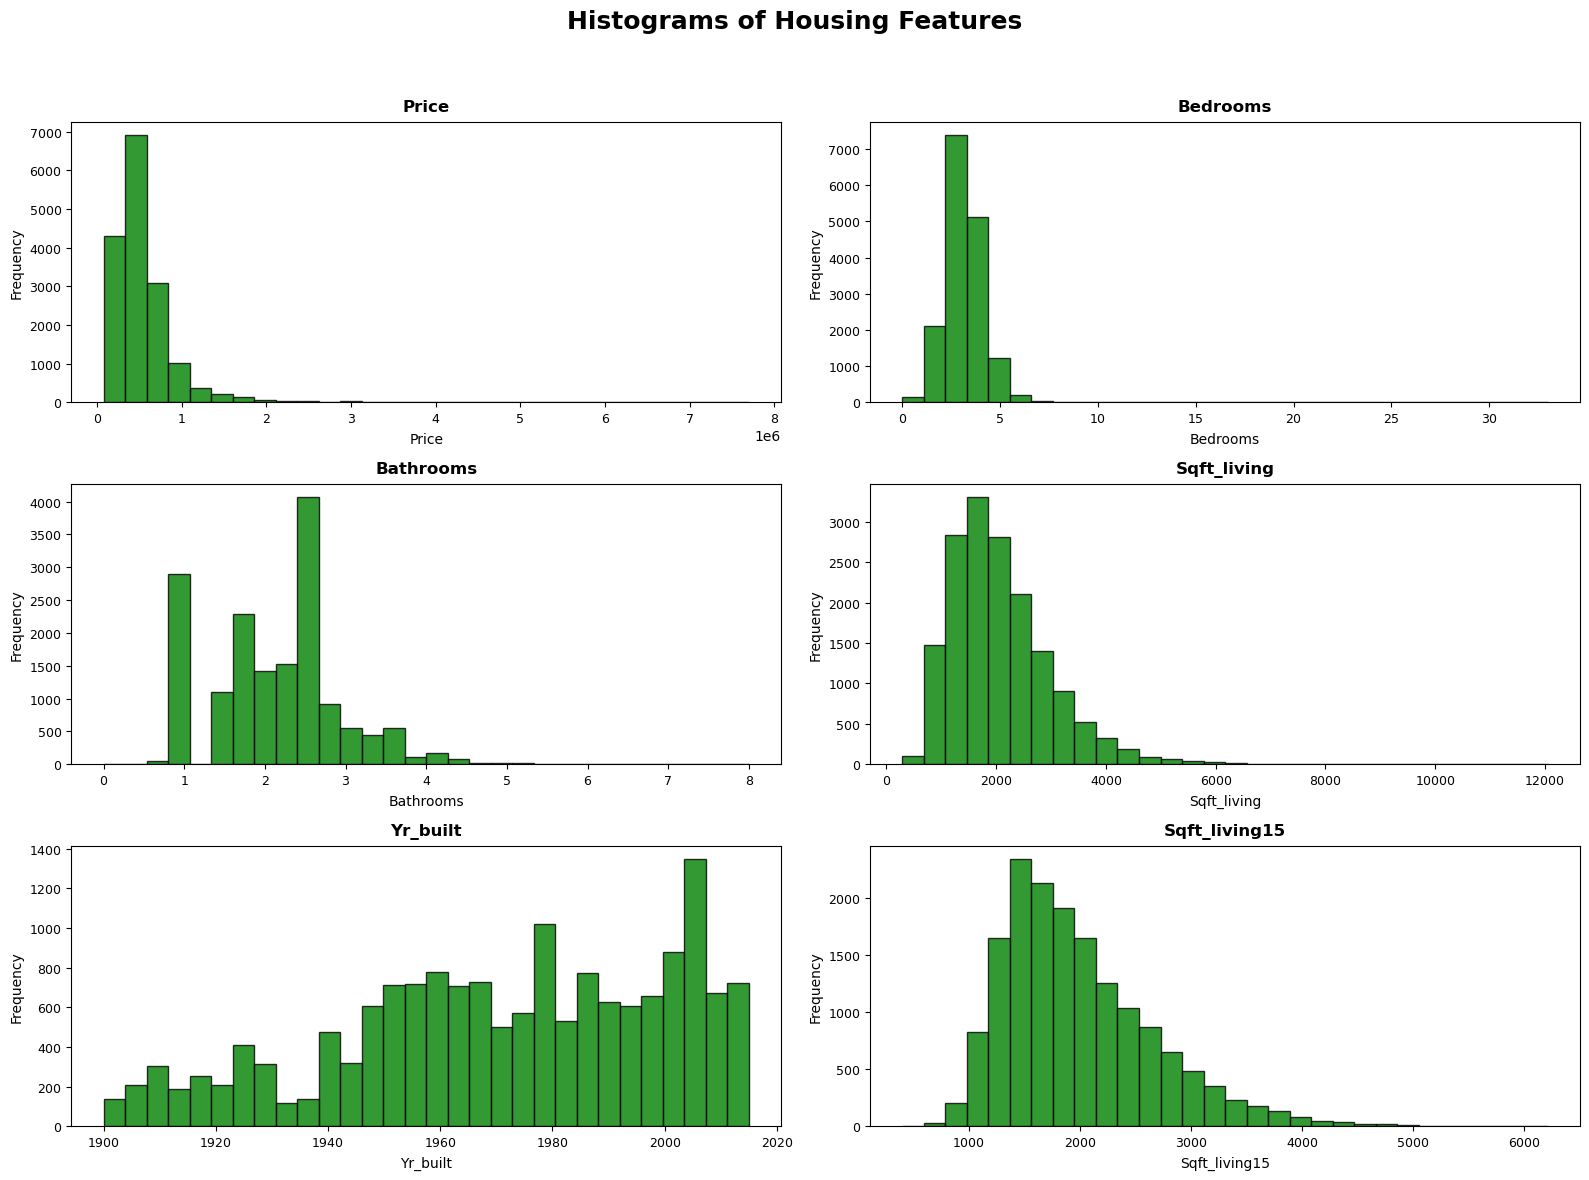

In [4]:
import matplotlib.pyplot as plt
significant_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'yr_built', 'sqft_living15']

plt.figure(figsize=(16, 12))

for i, col in enumerate(significant_features, 1):
    plt.subplot(3, 2, i)
    plt.hist(df_train[col], bins=30, color="green", alpha=0.8, edgecolor="black")
    plt.title(col.capitalize(), fontsize=12, fontweight="bold", pad=8)
    plt.xlabel(col.capitalize(), labelpad=5)
    plt.ylabel("Frequency")
    plt.tick_params(axis='both', labelsize=9)

plt.suptitle("Histograms of Housing Features", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## How are House Prices related to Important Numerical Features?

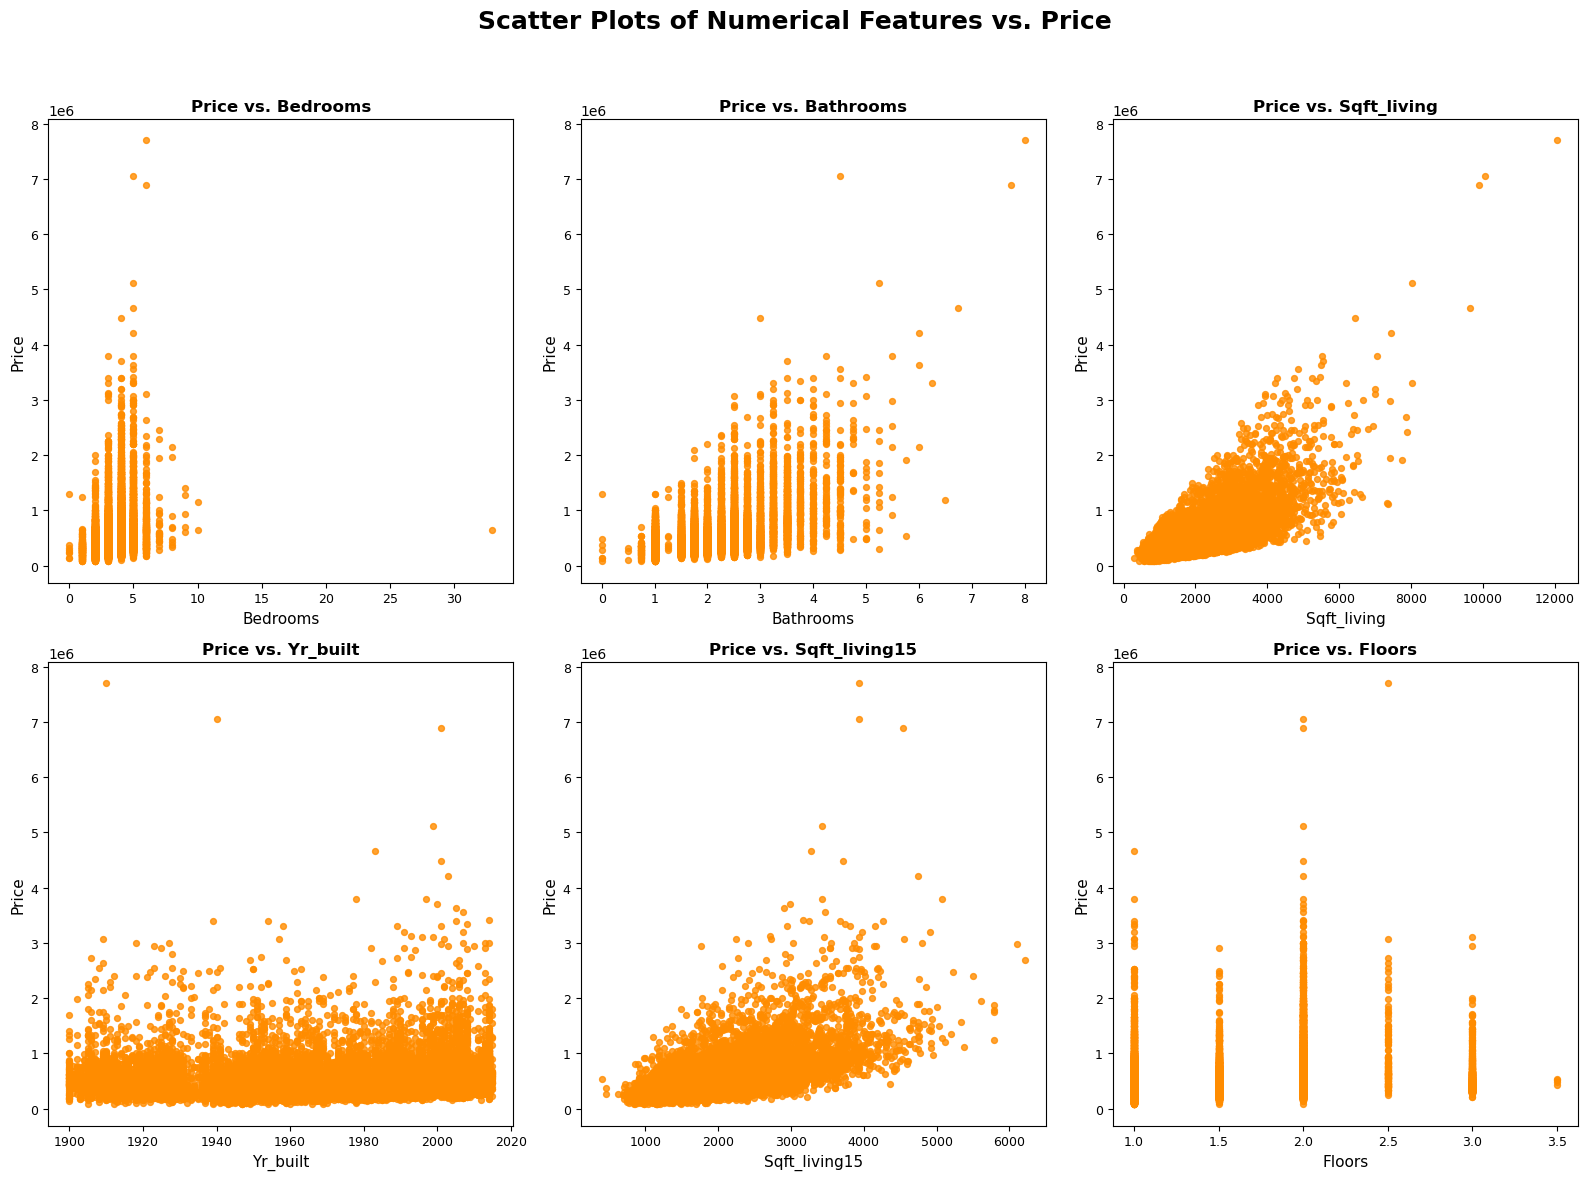

In [5]:
features_to_compare = ["bedrooms", "bathrooms", "sqft_living", "yr_built", "sqft_living15", "floors"]

plt.figure(figsize=(16, 12))

for i, col in enumerate(features_to_compare, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df_train[col], df_train["price"], color="darkorange", alpha=0.8, s=18)
    plt.xlabel(col.capitalize(), fontsize=11)
    plt.ylabel("Price", fontsize=11)
    plt.title(f"Price vs. {col.capitalize()}", fontsize=12, fontweight="bold")
    plt.tick_params(axis="both", labelsize=9)

plt.suptitle("Scatter Plots of Numerical Features vs. Price", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## How are House Prices related to Categorical Features?

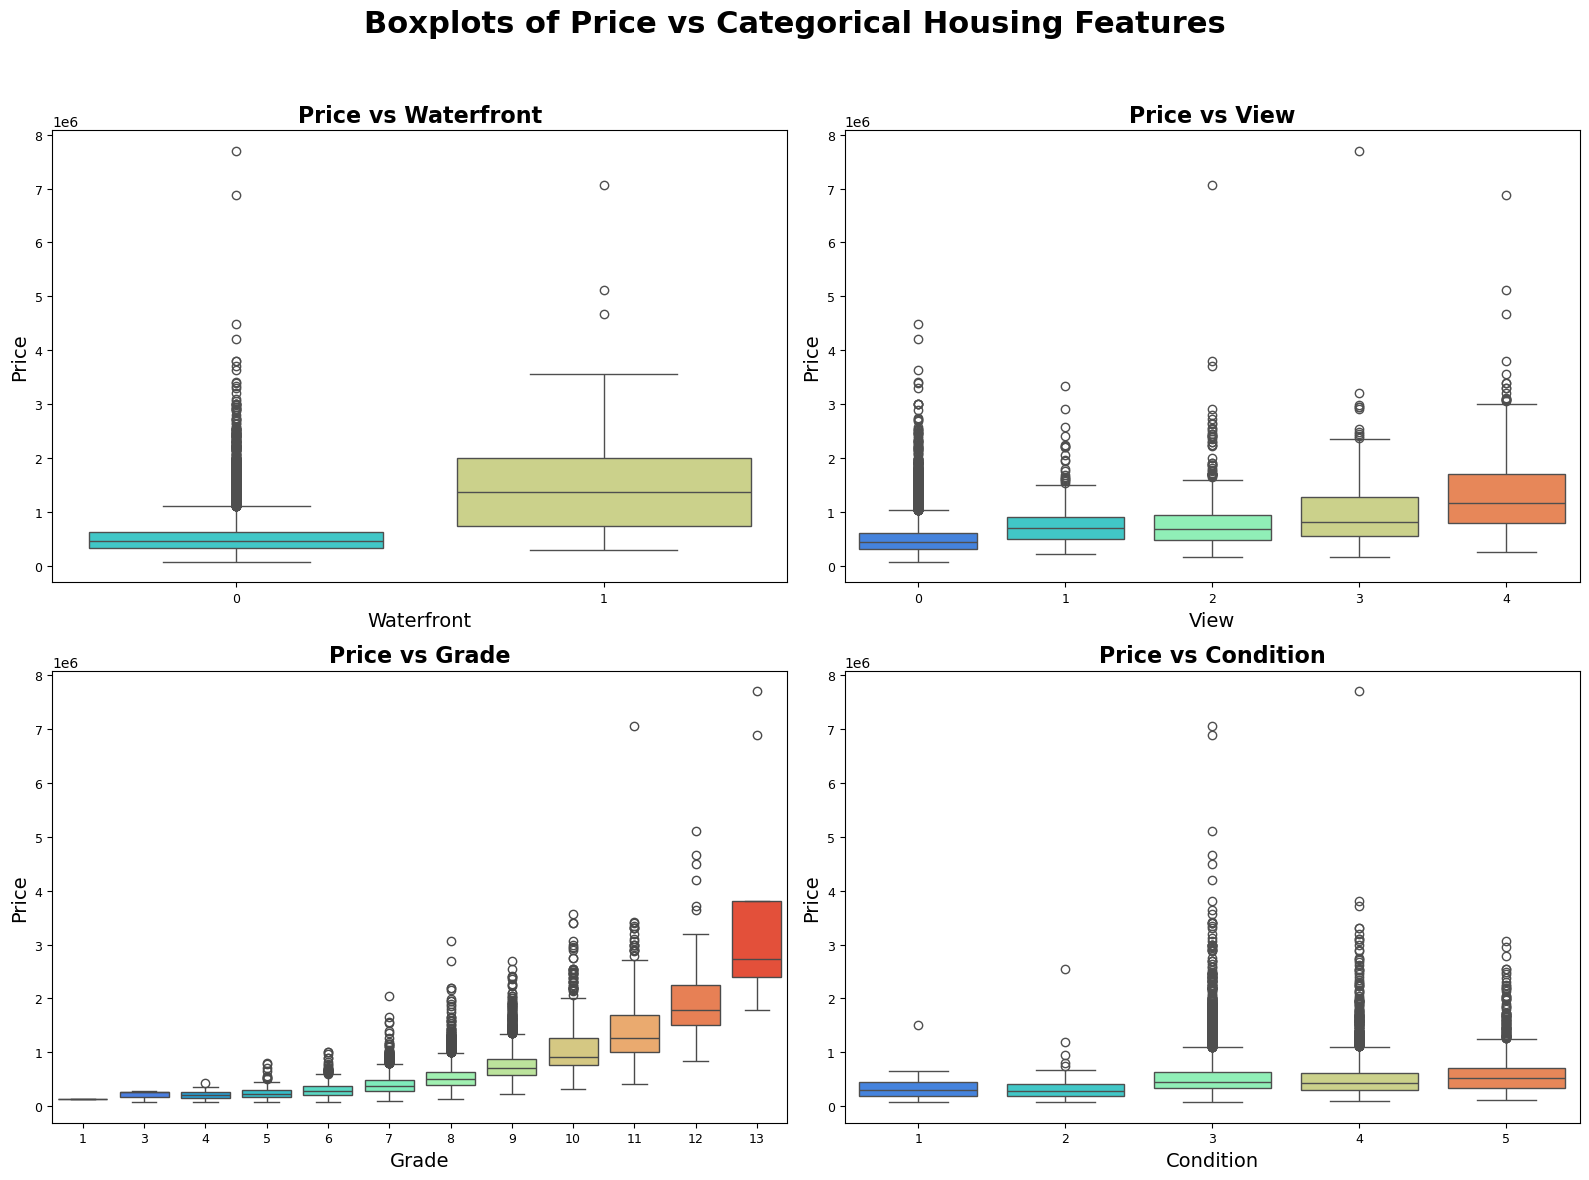

In [6]:
import seaborn as sns
categorical_features = ['waterfront', 'view', 'grade', 'condition']

plt.figure(figsize=(16, 12))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_train[col], y=df_train['price'], palette="rainbow")
    plt.title(f"Price vs {col.capitalize()}", fontsize=16, fontweight="bold")
    plt.xlabel(col.capitalize(), fontsize=14)
    plt.ylabel("Price", fontsize=14)
    plt.tick_params(axis="both", labelsize=9)

plt.suptitle("Boxplots of Price vs Categorical Housing Features", fontsize=22, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Understanding Correlation between features:

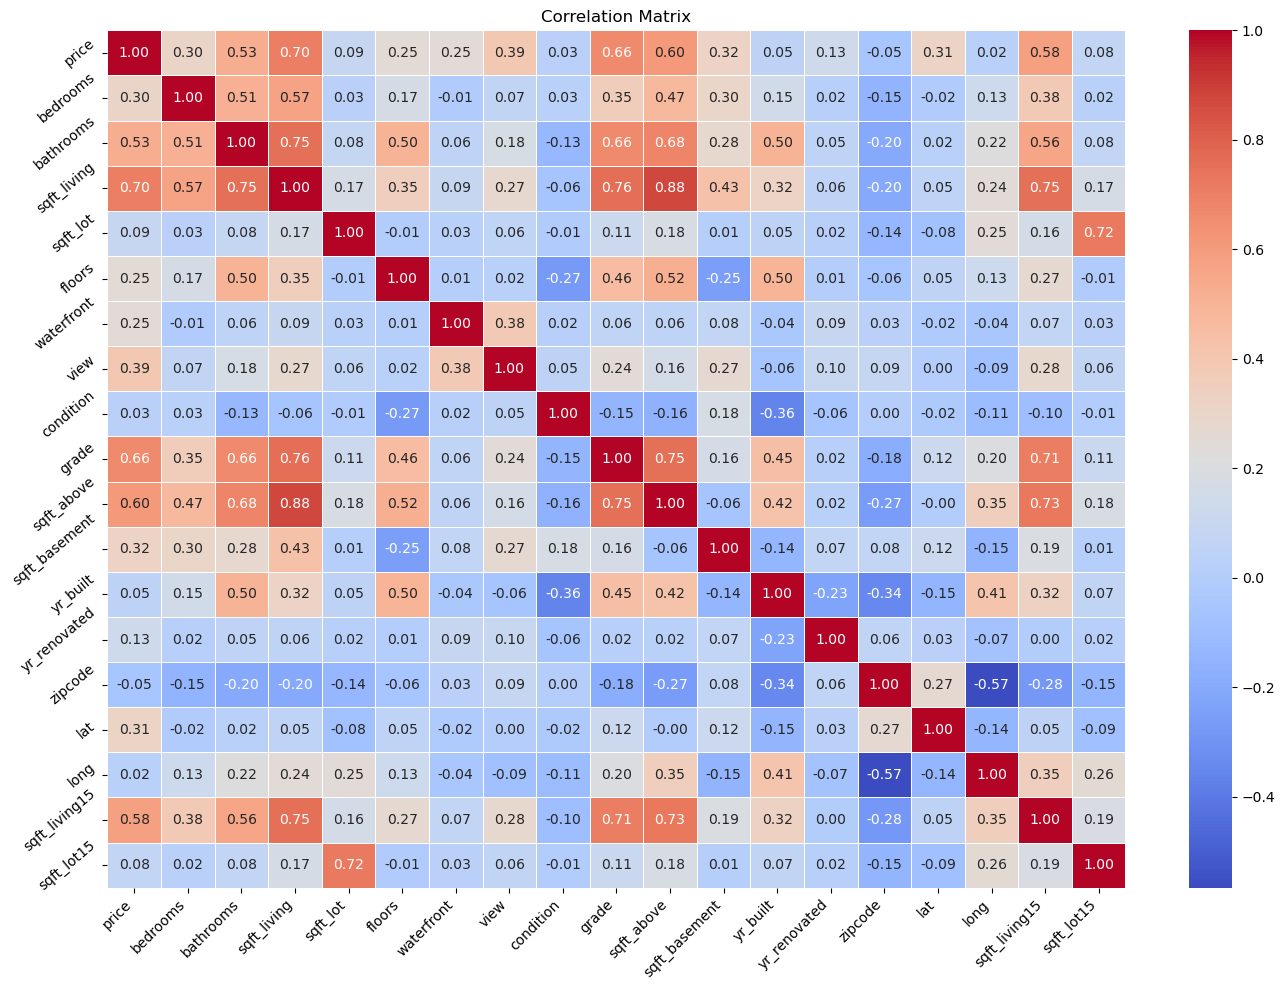

In [7]:
plt.figure(figsize=(14,10))

numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
                  'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

corr_matrix = df_train[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidth=0.5)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=40)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## Geospatial Analysis:

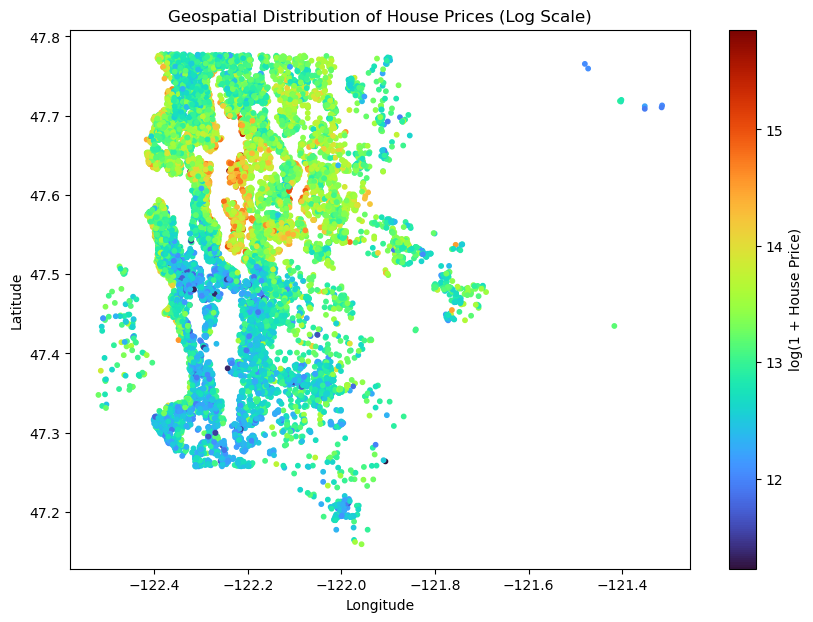

In [8]:
plt.figure(figsize=(10, 7))

sc = plt.scatter(df_train["long"], df_train["lat"], c=np.log1p(df_train["price"]), cmap="turbo", s=10, alpha=1)

plt.title("Geospatial Distribution of House Prices (Log Scale)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

cbar = plt.colorbar(sc)
cbar.set_label("log(1 + House Price)")
plt.show()

# ➕ Step 3: Feature Engineering

## Finding Age of House and whether it has been renovated or not?

In [9]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_train.date.head(2)

0   2015-05-05
1   2014-07-08
Name: date, dtype: datetime64[ns]

In [10]:
df_train['house_age'] = df_train['date'].dt.year - df_train['yr_built']
df_test['house_age'] = df_test['date'].dt.year - df_test['yr_built']

In [11]:
df_train['renovated'] = df_train['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df_test['renovated'] = df_test['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Had tried the following feature but it gave slightly worse results compared to above one:
# df_train['house_age_since_renovation'] = (df_train['date'].dt.year - df_train['yr_renovated']).clip(upper=df_train['house_age'])
# df_test['house_age_since_renovation'] = (df_test['date'].dt.year - df_test['yr_renovated']).clip(upper=df_test['house_age'])

In [12]:
df_train.drop(['date', 'yr_built', 'yr_renovated'], axis=1, inplace=True)
df_test.drop(['date', 'yr_built', 'yr_renovated'], axis=1, inplace=True)
df_train.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
0,9117000170,268643,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,98055,47.4362,-122.187,1660,9240,54,0
1,6700390210,245000,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,98031,47.4034,-122.187,1720,3605,22,0
2,7212660540,200000,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,98003,47.2704,-122.313,1870,7455,21,0
3,8562780200,352499,2,2.25,1240,705,2.0,0,0,3,7,1150,90,98027,47.5321,-122.073,1240,750,6,0
4,7760400350,232000,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,98042,47.3715,-122.074,1590,8071,20,0


# ✅ Step 4: Save the preprocessed dataset

In [13]:
df_train.to_pickle("train_processed.pkl")
df_test.to_pickle("test_processed.pkl")

print("✓ Processed datasets saved as pickle")

✓ Processed datasets saved as pickle
